# This notebook is a mathematical approach to a local data set for COVID-19 data. 
I used some visualizations, mathematical growth approaches and linear regression analysis.

First, I need to import the libraries I am going to use.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd
import pylab as pl
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Then, I'll import the first data set I'm going to use. This includes local and pennsylvania data supplied by a local health system. The last bit of code will display the data set.

In [3]:
# import file
file_name = '/Users/juliettegudknecht/Downloads/c19cases.csv'

df_raw = pd.read_csv(file_name)
df_raw

,Date,Testd_ordered,Positive,Negative,total_positive,total_negative,PA_total_Negative,PA_total_Positive,PA_new_tests,PA_New_positives
0,0,1,0,1,0,1,0,2,0,2
1,1,1,0,1,0,2,0,4,2,2
2,2,0,0,0,0,2,0,6,2,2
3,3,0,0,0,0,2,0,10,4,4
4,4,0,0,0,0,2,0,12,2,2
5,5,3,0,3,0,5,88,16,92,4
6,6,5,0,5,0,10,116,22,34,6
7,7,0,0,0,0,10,140,41,43,19
8,8,5,1,4,1,14,205,47,71,6
9,9,2,1,1,2,15,205,63,16,16


Next, I ran a statistical analysis. 

In [4]:
df_raw.describe()

,Date,Testd_ordered,Positive,Negative,total_positive,total_negative,PA_total_Negative,PA_total_Positive,PA_new_tests,PA_New_positives
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,21.500000,248.022727,32.704545,175.000000,397.136364,2674.613636,40170.863636,8112.568182,3499.159091,706.113636
std,12.845233,176.982260,33.367983,137.387925,480.259309,2613.419432,43216.118658,10181.595090,2889.395462,682.446598
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000
25%,10.750000,12.250000,1.750000,11.750000,4.000000,30.500000,826.750000,91.000000,316.000000,19.750000
50%,21.500000,312.500000,19.000000,177.000000,164.500000,2026.500000,23135.000000,2484.500000,3919.500000,546.500000
75%,32.250000,405.000000,59.750000,290.750000,704.000000,4872.000000,78114.000000,14979.000000,5948.000000,1375.500000
max,43.000000,495.000000,111.000000,398.000000,1439.000000,7700.000000,122896.000000,31069.000000,7915.000000,1989.000000


Now I am simply creating a new data frame with less values, so there is less clutter.  
These values include the Dates and total positive cases as a running total.

In [42]:
df = df[['Date','total_positive', 'PA_total_Positive']]

First I am running a scatterplot to see the relationship.

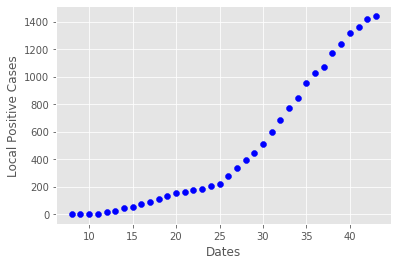

In [9]:
plt.scatter(df.Date[8:], df.total_positive[8:],  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.show()

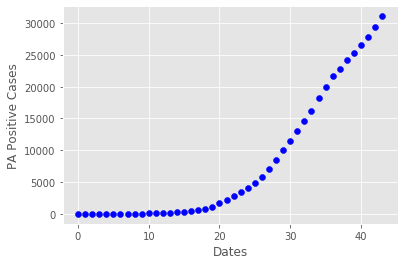

In [10]:
plt.scatter(df.Date, df.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("PA Positive Cases")
plt.show()

The plots seem to be exponential. If the plots truly are exponential, then when plotted with a log scale of dates, the graphs should be linear. Lets check...

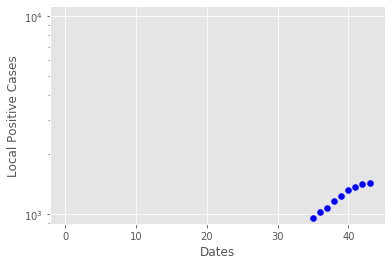

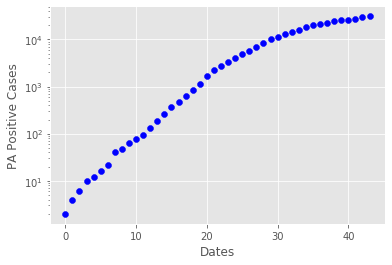

In [12]:
plt.scatter(df.Date, df.total_positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.yscale('log')
plt.show()

plt.scatter(df.Date, df.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("PA Positive Cases")
plt.yscale('log')
plt.show()

Something weird happened here, the first graph is missing data from 10^1 to 10^3. The reason behind this can be found if we look at the data set. 

In [13]:
df.total_positive

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        2
10       4
11       4
12      15
13      22
14      44
15      54
16      71
17      85
18     110
19     129
20     150
21     157
22     172
23     182
24     201
25     217
26     276
27     338
28     395
29     445
30     511
31     600
32     682
33     770
34     845
35     956
36    1026
37    1067
38    1168
39    1238
40    1316
41    1363
42    1419
43    1439
Name: total_positive, dtype: int64

The first 7 entries are zero. When the log[0] is taken, it's undefined. Thus causing the graph to not show. This is a simple fix, just take the values starting from the 8th value. This shouldn't matter, considering there were no cases.

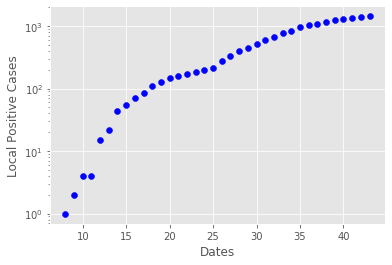

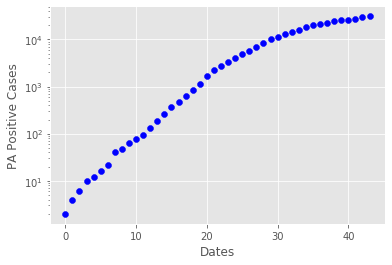

In [25]:
plt.scatter(df.Date[8:], df.total_positive[8:],  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.yscale('log')
plt.show()

plt.scatter(df.Date, df.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("PA Positive Cases")
plt.yscale('log')
plt.show()

Now we see that the graph is pretty much linear. Note that it is very hard for the data to be perfect in this situation. Its not like we have a dataset being refreshed with new cases as they come. A test has to be done to know if someone is positive, so there can be unforeseen influxes. Overall, the cases seem linear on a log scale. It should be noted that the graph seems to be tapering off at the end. This is a sign that the growth is slowing down!

## Next we will look at a linear regression predictive forecast. 
This is done by training the data. The numpy random module helps with this. Another model I used was from sklearn - the linear model. Scipy was also used. We must used the linear data from before for the linear regression (log scale).

Coefficients:  [[684.18116987]]
Intercept:  [-6868.36336077]


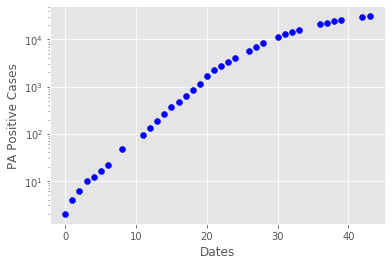

In [32]:
# linear regression 

# train
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.Date, train.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("PA Positive Cases")
plt.yscale('log')
#plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Date']])
train_y = np.asanyarray(train[['PA_total_Positive']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


In [33]:
# logistic regression
from scipy.optimize import curve_fit
coviddata = df
coviddata = pd.pivot_table(coviddata, values=['total_positive', 'PA_total_Positive'], index=['Date'], aggfunc=np.sum)

# we will want x_data to be the number of days since first confirmed and the y_data to be the positive cases data. 
# This will be the data we use to fit a logistic curve.

x_data = coviddata.index
y_data = coviddata['PA_total_Positive']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,160), k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()


0.2121107841984122 33.3327047185127 33738.01425838461


Date
39    25345
40    26490
41    27735
42    29441
43    31069
Name: PA_total_Positive, dtype: int64

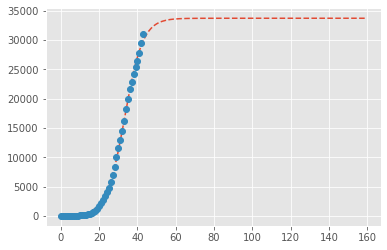

In [34]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,160), y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='PA Positive Cases')

Coefficients:  [[33.80430963]]
Intercept:  [-319.92054785]
0.18932410670030386 34.37682317616112 1749.8549481350867


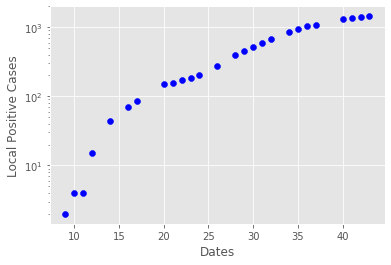

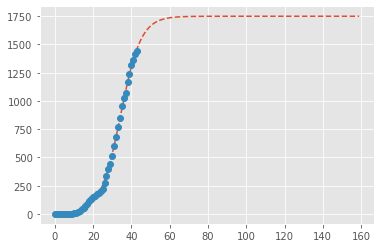

In [36]:
# train
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.Date[8:], train.total_positive[8:],  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.yscale('log')
#plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Date']])
train_y = np.asanyarray(train[['total_positive']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# we will want x_data to be the number of days since first confirmed and the y_data to be the confirmed data. This will be the data we use to fit a logistic curve
x_data = coviddata.index
y_data = coviddata['total_positive']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,160), k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()

# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,160), y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='Local Positive Cases')

The linear regressions look very similar. I want compare with the US!

In [50]:
us = pd.read_csv('/Users/juliettegudknecht/Downloads/uspositives.csv')
us.head()

,date,positive
0,1.0,1.0
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0


This data starts from a different date. I looked at the data and the local data starts 3/6, which is the 43rd day of US data

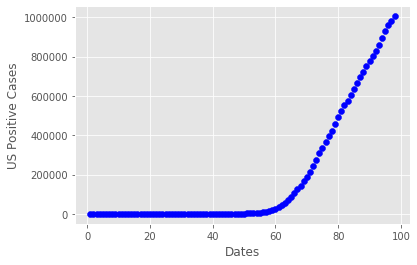

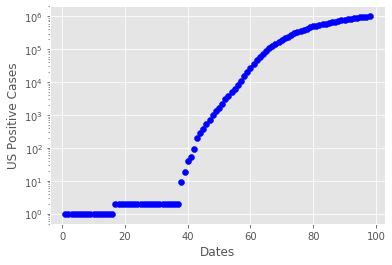

In [51]:
plt.scatter(us.date, us.positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("US Positive Cases")
plt.show()

plt.scatter(us.date, us.positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("US Positive Cases")
plt.yscale('log')
plt.show()

I am going to compare Growth Factor, Growth Ratio, Growth Rate, and 2nd derivative. These are all mathematical terms, the definitions can be found in the ppt.

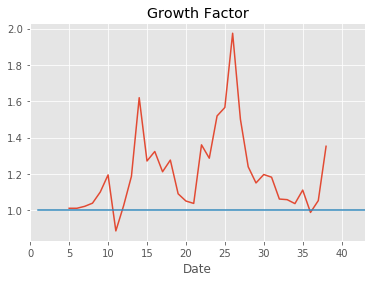

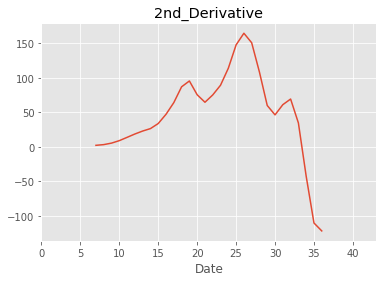

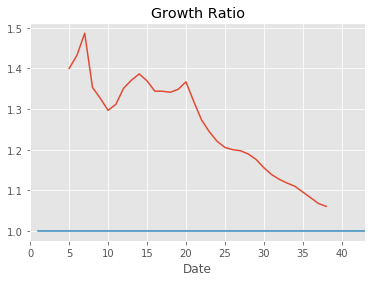

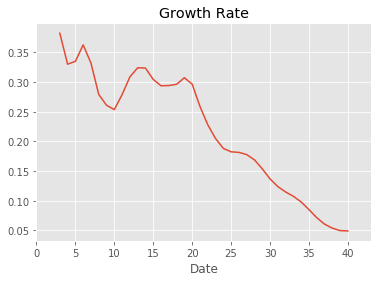

In [19]:
table = df
table2 = pd.pivot_table(table, values=['PA_total_Positive','total_positive'], index=['Date'], aggfunc=np.sum)

# Growth Factor
w = 0.5
table2['GrowthFactor'] = growth_factor(table2['total_positive'])
table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

# 2nd Derivative
table2['2nd_Derivative'] = np.gradient(np.gradient(table2['PA_total_Positive'])) #2nd derivative
table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


#Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
table2['GrowthRatio'] = growth_ratio(table2['PA_total_Positive'])
table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
#Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
table2['GrowthRate']=np.gradient(np.log(table2['PA_total_Positive']))
table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)

x_coordinates = [1, 100]
y_coordinates = [1, 1]

#plots
table2['GrowthFactor'].plot(title='Growth Factor')
plt.plot(x_coordinates, y_coordinates) 
plt.savefig('growthfactor.png')
plt.show()

table2['2nd_Derivative'].plot(title='2nd_Derivative')
plt.savefig('secondderivative.png')
plt.show()

table2['GrowthRatio'].plot(title='Growth Ratio')
plt.plot(x_coordinates, y_coordinates)
plt.savefig('growthratio.png')
plt.show()

table2['GrowthRate'].plot(title='Growth Rate')
plt.savefig('Growthrate.png')
plt.show()

## Takeaways:

We should consider that there is a lot of statistical uncertainty in this prediction. 
This is almost certainly underestimating. 
It is too early to use this method to get a reasonable estimate. 
The number of positive undiagnosed cases in each country is likely to be significant. 
Most of US aren't testing enough, or weren’t at some point


This model would suggest that around day 60 pennsylvania cases should slow down. Our data went up to day 43 (04/18), so day 60 would be may 5th, which closely aligns with the dates that were planned for lifting quarantine.
The sad part is there are already more than 38k cases in PA. 
I believe the discrepancy is due to the reasons listed before, like some people with mild symptoms not being tested earlier so the growth rate was affected.

Thanks for reading! -Juliette